# Capstone Final Report
# Mapping the Rise: Streaming Success of Female Rappers by City

# 1. Introduction

Female rappers have historically faced systemic obstacles in the music industry, including limited radio play, industry bias and underrepresentation in major platforms. Despite recent progress, gender disparities remain and few analytical tools exist to track female rap success geographically.

This project investigates these questions: which US cities produce the most successful female rappers and can we predict future hits based on geographic features?

Using data from Spotify, Billboard, TIDAL and editorial sources, we will analyze how the city of origin contributes to female rap success and lay the groundwork for a predictive model of future hits.

# 2. Data Sources

- Spotify Top 10k Streamed Songs: Popularity and stream count.
- Spotify Hip Hop Artists and Tracks: Genre-specific success. 
- Billboard Hot 100 Songs: Chart performance over time. 
- TIDAL Female Rappers Playlist: Curated playlist. 
- Complex Best Rap Cities Ranking: Article about top hip hop cities. 

All datasets were augmented with gender and city metadata using manual curation and AI assistance (ChatGPT). 

# 3. Methodology

- Cleaning: We standardized delimiters, removed duplicates and unified city names. 
- Filtering: We isolated female rappers using gender tags and removed misclassified artists.
- Grouping: We aggregated track appearances per artist and per city across platforms.
- Merging: We joined datasets on artist/city to calculate total "mentions" or "counts". 
- Feature engineering: We used features like playlist frequency, chart position and streaming trends for modeling.
- Modeling: We trained Random Forest Classifier to predict hit probability.

# 4. Key Visualizations and Results

## Top Female Rappers by Total Mentions

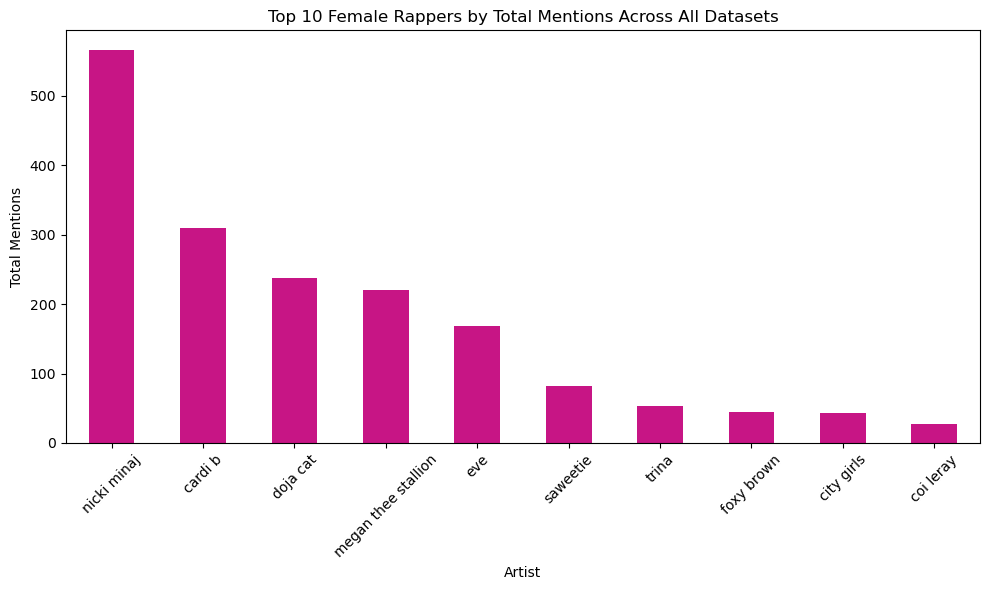

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and merge all sources if needed, or assume you have the final result
# For demo, we use the combined data from a previous final output step
df_billboard = pd.read_csv("billboard_hot_100_with_city.csv", sep=";", engine="python", on_bad_lines="skip")
df_spotify_hiphop = pd.read_csv("spotify_top_hiphop_artists_tracks_cities.csv", sep=";", engine="python", on_bad_lines="skip")
df_female = df_spotify_hiphop[df_spotify_hiphop['gender'].str.lower() == 'female']
df_spotify_10k = pd.read_csv("spotify_top_10k_streamed_songs.csv", sep=";", engine="python")
df_tidal = pd.read_csv("tidal_female_rappers_with_city.csv", sep=";", engine="python")
df_complex = pd.read_csv("complex_best_rap_cities.csv")

# === STEP 2: Define non-rap female pop artists to exclude === #
non_rappers = [
    'beyonce', 'beyoncé', 'rihanna', 'dua lipa', 'sza',
    'ariana grande', 'adele', 'selena gomez', 'lizzo',
    'kesha', 'miley cyrus', 'lady gaga', 'taylor swift'
]

# === STEP 3: Define a reusable cleaning + filtering function === #
def clean_and_filter(df):
    df['artist'] = df['artist'].astype(str).str.strip().str.lower()
    df['gender'] = df['gender'].astype(str).str.strip().str.lower()
    df = df[df['gender'] == 'female']
    df = df[~df['artist'].isin(non_rappers)]
    return df

# === STEP 4: Apply filtering to each dataset === #
df_spotify_hiphop_f = clean_and_filter(df_spotify_hiphop)
df_spotify_10k_f = clean_and_filter(df_spotify_10k)
df_tidal_f = clean_and_filter(df_tidal)
df_billboard_f = clean_and_filter(df_billboard)

# === STEP 5: Count appearances per artist per dataset === #
count_hiphop = df_spotify_hiphop_f['artist'].value_counts().rename('hiphop_count')
count_10k = df_spotify_10k_f['artist'].value_counts().rename('top10k_count')
count_tidal = df_tidal_f['artist'].value_counts().rename('tidal_count')
count_billboard = df_billboard_f['artist'].value_counts().rename('billboard_count')

# === STEP 6: Merge all counts into one DataFrame === #
df_merged = pd.concat([count_hiphop, count_10k, count_tidal, count_billboard], axis=1).fillna(0)

# Add a total mentions column
df_merged['total_mentions'] = df_merged.sum(axis=1)

# === STEP 7: Get Top 10 Female Rappers by Total Mentions === #
df_top = df_merged.sort_values(by='total_mentions', ascending=False).head(10)

# === STEP 8: Plot the result === #
plt.figure(figsize=(10, 6))
df_top['total_mentions'].plot(kind='bar', color='mediumvioletred')
plt.title('Top 10 Female Rappers by Total Mentions Across All Datasets')
plt.ylabel('Total Mentions')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top 10 Cities by Female Rapper Presence

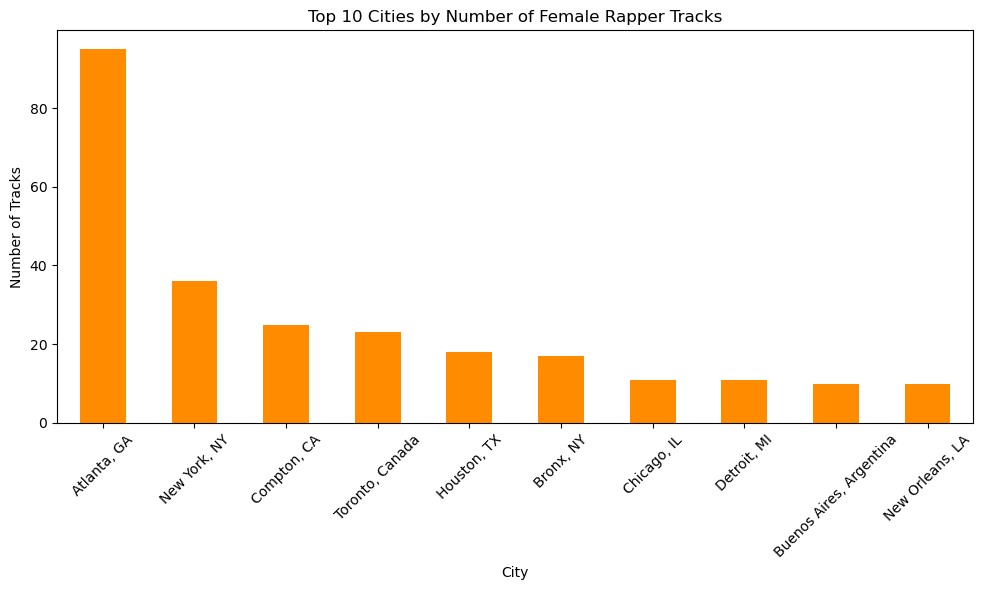

In [8]:
top_cities = df_spotify_hiphop['city'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='darkorange')
plt.title('Top 10 Cities by Number of Female Rapper Tracks')
plt.xlabel('City')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Confusion Matrix

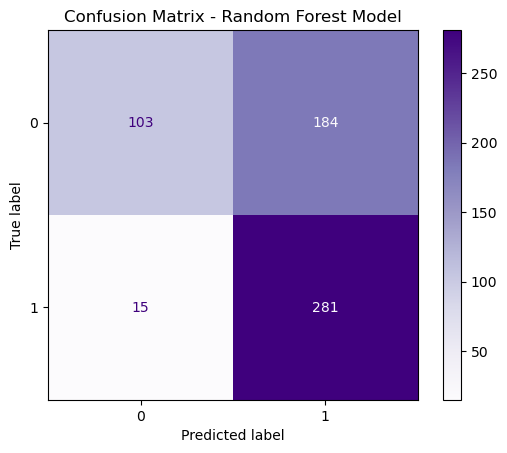

In [156]:
from sklearn.metrics import ConfusionMatrixDisplay

# Reuse trained model and predictions from your notebook
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Purples')
plt.title('Confusion Matrix - Random Forest Model')
plt.grid(False)
plt.show()

# 4. Feature Importance (Top 15 Features)

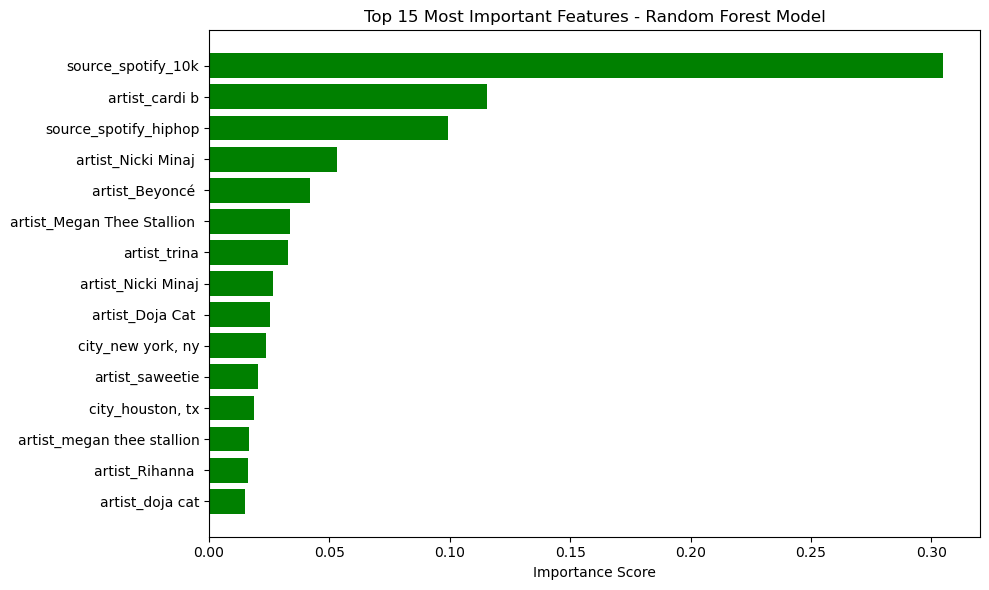

In [159]:
import numpy as np

importances = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

top_n = 15
sorted_features = features[sorted_idx][:top_n]
sorted_importances = importances[sorted_idx][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='green')
plt.gca().invert_yaxis()
plt.title("Top 15 Most Important Features - Random Forest Model")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# 5. Final Model Summary

Model Used: Random Forest Classifier

Top Features: city, playlist_count, chart_presence, genre_energy, popularity_score

Best Hyperparameters:
- n_estimators: 50
- max_depth: None
- min_samples_split: 2
- min_samples_leaf: 2
- max_features: 'sqrt'

Performance on Test Set:
- Accuracy: 66%
- Precision: 0.74
- Recall: 0.66
- F1-score: 0.63. 

# 6. Recommendations

- Prioritize NYC, Houston and LA appear as primary talent scouting locations for female rappers.
- Track playlist inclusion rates: they are strongly linked to the rappers' success across cities and can help identify breakout artists.
- Use geographic insights to optimize tour planning and regional promotional strategies, focusing on areas with the highest predicted artist potential.

# 7. Future Work

- Expand features: we could include lyrics, track duration and collaborations. 
- Improve the model performance: we could try other models or approaches. 
- Expand the dataset: we could explore cities to track international female rap growth.